# Import ```FLAME``` and ```flame-utils``` module

In [1]:
from flame import Machine
from flame_utils import ModelFlame, hplot

# Create ```ModelFlame``` object from lattice file ('PS_demo.lat')

In [2]:
fm = ModelFlame(lat_file='./PS_demo.lat')

# Run ```FLAME```

In [3]:
r, s = fm.run()

# Plot transverse beam envelopes

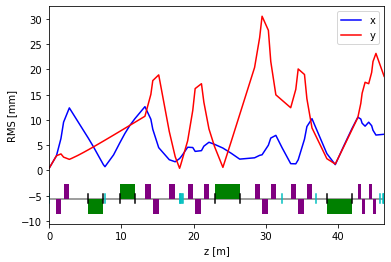

In [4]:
hplot('xrms', 'yrms', machine=fm)

# Check finite beam size

In [5]:
r, s = fm.run()
print('xrms = {} [mm]'.format(s.xrms))
print('yrms = {} [mm]'.format(s.yrms))

xrms = 7.170075852777757 [mm]
yrms = 18.641418836190123 [mm]


# Import ```scipy``` and optimizer

In [6]:
import numpy as np
from scipy.optimize import minimize, differential_evolution

# Define generic cost function

In [7]:
def cost_generic(x, knob, obj):
    for i, n in enumerate(knob.keys()):
        fm.reconfigure(n, {knob[n]:x[i]})
    r, s = fm.run(to_element=obj['location'])
    t = obj['target']
    dif = np.array([getattr(s, n)-v for n,v in zip(t.keys(), t.values())])
    return sum(dif*dif)

# Define knobs and target objects (set by GUI)

In [8]:
knob = {'qd1':'B2', 'qd2':'B2', 'qd3':'B2', 'qd4':'B2'}
obj = {'location': 'FS_F1S2:VD_D1464',
       'target': {'xrms':1.5, 'yrms':1.5}}

# Optimization

## optimization by 'Nelder-Mead', x0 is the initial values

In [9]:
x0 = np.array([fm.get_element(name=n)[0]['properties'][knob[n]] for n in knob])
ans = minimize(cost_generic, x0, args=(knob, obj),method='Nelder-Mead')

## optimization by 'differential_evolution', x0 is the lower and upper limits of the knobs

In [10]:
x0 = [(-10, 10), (-10, 10), (-10, 10), (-10, 10)]
ans = differential_evolution(cost_generic, x0, args=(knob, obj), workers=-1)

/home/k/anaconda3/lib/python3.7/site-packages/scipy/optimize/_differentialevolution.py:535: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  " updating='deferred'", UserWarning)


# Check optimized beam size

In [11]:
r, s = fm.run()
print('xrms = {} [mm]'.format(s.xrms))
print('yrms = {} [mm]'.format(s.yrms))

xrms = 1.5000000225949637 [mm]
yrms = 1.4999999988809993 [mm]


# Plot transverse beam envelopes

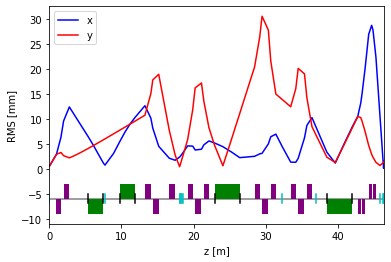

In [12]:
hplot('xrms', 'yrms', machine=fm)

# Optional Task

We also includes the weight for each parameter, like

In [13]:
knob = {'qd1':'B2', 'qd2':'B2', 'qd3':'B2', 'qd4':'B2'}
obj = {'location': 'FS_F1S2:VD_D1464',
       'target': {'xrms':[1.5, 1], 'yrms':[1.5, 1], 'xtwsa':[0.0, 10], 'ytwsa':[0.0, 10]}}
# e.g. for xrms, 1.5 is the target value, 1 is the mulitiplication factor

In [14]:
def cost_generic(x, knob, obj):
    for i, n in enumerate(knob.keys()):
        fm.reconfigure(n, {knob[n]:x[i]})
    r, s = fm.run(to_element=obj['location'])
    dif = []
    t = obj['target']
    for n, v in zip(t.keys(), t.values()):
        if isinstance(v, (list, tuple)):
            val = getattr(s, n)*v[1] - v[0]
        elif isinstance(v, (int, float)):
            val = getattr(s, n) - v
        else:
            val = 0.0
        dif.append(val)
    dif = np.asarray(dif)
    return sum(dif*dif)

In [15]:
x0 = [(-10, 10), (-10, 10), (-10, 10), (-10, 10)]
ans = differential_evolution(cost_generic, x0, args=(knob, obj), workers=-1)

/home/k/anaconda3/lib/python3.7/site-packages/scipy/optimize/_differentialevolution.py:535: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  " updating='deferred'", UserWarning)


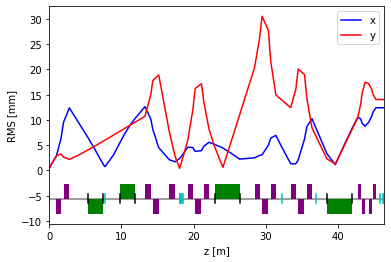

In [16]:
hplot('xrms', 'yrms', machine=fm)